#**Thông tin sinh viên:**
* MSSV: 19521388
* Họ và tên: Hoàng Tiến Dũng
* Lớp môn học: CS331.M11
* Bài tập: Phát hiện gương mặt từ feature map

#**Bài làm:**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [13]:
# Đọc ảnh
os.chdir("/content/drive/MyDrive/Private_ThiGiacMayTinhNangCao")
input = cv.imread("./Input.png")
fm = cv.imread("./FeatureMap.png", 0) 

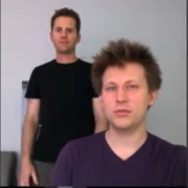

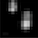

In [14]:
cv2_imshow(input)
cv2_imshow(fm)

In [15]:
print(f"Input image shape: {input.shape}")
print(f"Feature map image shape: {fm.shape}")

Input image shape: (188, 188, 3)
Feature map image shape: (38, 38)


In [16]:
def findbbox(input_img, fm_img, thresh_value = 110, thresh_area=30, save_img = False, path_img = "img_with_bbox.jpg"):
    """Tìm bounding box gương mặt với ảnh feature map."""

    # Kiểm tra điều kiện kích thước của input image và feature map image
    if len(input_img.shape) != 3:
        print("Check input shape!")
        return
    elif len(fm_img.shape) != 2:
        print("Check feature map shape!")
        return
    
    # Tìm ngưỡng với giá trị ngưỡng bằng thresh_value
    _, fm_thresh = cv.threshold(fm, thresh_value, 255, cv.THRESH_BINARY)
    print("Feature map image after threshold:")
    cv2_imshow(fm_thresh)

    # Tìm contours của ảnh feature map vừa lọc ngưỡng
    contours, _ = cv.findContours(fm_thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

    # Lấy shape của input và feature map
    im = input_img.copy()
    x_inp, y_inp, c_inp = input_img.shape
    x_fm, y_fm = fm_img.shape

    # Kiểm tra và vẽ bounding box lên input image
    bbox = []
    for c in contours:
        # Tìm bouding box của mỗi contour
        rect = cv.boundingRect(c)
        x, y, w, h = rect
        # Nếu diện tích bouding box bé hơn thresh_area lần so với ảnh feature map 
        # hoặc rộng bbox hớn hơn 3 lần cao bbox 
        # hoặc cao bbox lớn hơn 4 lần rộng bbox thì không lấy bbox đó
        if (w * h) / (x_fm * y_fm) < 1 / thresh_area or w > 3 * h or h > 4 * w: 
            continue
        else:
            # Tìm và vẽ bounding box trên input image dựa vào tỉ lệ
            bbox.append(rect)
            x_new = int(x_inp / x_fm * x)
            y_new = int(y_inp / y_fm * y)
            w_new = int(x_inp / x_fm * w)
            h_new = int(y_inp / y_fm * h)
            cv.rectangle(im, (x_new, y_new), (x_new+w_new, y_new+h_new), (0, 255, 0), 2)
    print(f"Bounding boxes: {bbox}")
    if save_img==True:
        cv.imwrite(path_img, im)
        print("Saved!")
    return im

Feature map image after threshold:


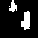

Bounding boxes: [(21, 11, 9, 19), (9, 0, 8, 12)]
Saved!


In [17]:
im = findbbox(input, fm, thresh_value=90, save_img=True)

Input image with bounding box:


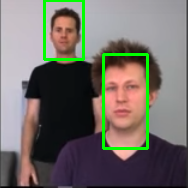

In [18]:
print("Input image with bounding box:")
cv2_imshow(im)